# TF-IDF Vectorizer

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

toy_corpus = ["the fat cat sat on the mat", "the big cat slept", "the dog chased a cat"]
vectorizer = TfidfVectorizer(use_idf=True)
print("vectorizer:", vectorizer)

corpus_tfidf = vectorizer.fit_transform(toy_corpus)
print("corpus_tfidf:", corpus_tfidf)
print("corpus_tfidf:", corpus_tfidf.toarray())

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df = pd.DataFrame(np.round(corpus_tfidf.toarray(), 2))
df.columns = vectorizer.get_feature_names_out()
df

vectorizer: TfidfVectorizer()
corpus_tfidf:   (0, 9)	0.492859226794123
  (0, 4)	0.417241605129712
  (0, 1)	0.2464296133970615
  (0, 7)	0.417241605129712
  (0, 6)	0.417241605129712
  (0, 5)	0.417241605129712
  (1, 9)	0.35959372325985667
  (1, 1)	0.35959372325985667
  (1, 0)	0.6088450986844796
  (1, 8)	0.6088450986844796
  (2, 9)	0.35959372325985667
  (2, 1)	0.35959372325985667
  (2, 3)	0.6088450986844796
  (2, 2)	0.6088450986844796
corpus_tfidf: [[0.         0.24642961 0.         0.         0.41724161 0.41724161
  0.41724161 0.41724161 0.         0.49285923]
 [0.6088451  0.35959372 0.         0.         0.         0.
  0.         0.         0.6088451  0.35959372]
 [0.         0.35959372 0.6088451  0.6088451  0.         0.
  0.         0.         0.         0.35959372]]
The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


## Classification

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

labels = [0, 1, 0]
clf = SVC()
clf.fit(df, labels)

SVC()

In [3]:
clf.predict(df)

array([0, 1, 0])

# Building a LM Model

Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.

## Training a bigram LM

In [4]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download("gutenberg")
nltk.download("punkt_tab")
macbeth = gutenberg.sents("shakespeare-macbeth.txt")

model, vocab = padded_everygram_pipeline(2, macbeth)
lm = MLE(2)
lm.fit(model, vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


In [5]:
# !apt-get install tree
!tree -a /root/nltk_data

/root/nltk_data
├── corpora
│   ├── gutenberg
│   │   ├── austen-emma.txt
│   │   ├── austen-persuasion.txt
│   │   ├── austen-sense.txt
│   │   ├── bible-kjv.txt
│   │   ├── blake-poems.txt
│   │   ├── bryant-stories.txt
│   │   ├── burgess-busterbrown.txt
│   │   ├── carroll-alice.txt
│   │   ├── chesterton-ball.txt
│   │   ├── chesterton-brown.txt
│   │   ├── chesterton-thursday.txt
│   │   ├── edgeworth-parents.txt
│   │   ├── melville-moby_dick.txt
│   │   ├── milton-paradise.txt
│   │   ├── README
│   │   ├── shakespeare-caesar.txt
│   │   ├── shakespeare-hamlet.txt
│   │   ├── shakespeare-macbeth.txt
│   │   └── whitman-leaves.txt
│   └── gutenberg.zip
└── tokenizers
    ├── punkt
    │   ├── czech.pickle
    │   ├── danish.pickle
    │   ├── .DS_Store
    │   ├── dutch.pickle
    │   ├── english.pickle
    │   ├── estonian.pickle
    │   ├── finnish.pickle
    │   ├── french.pickle
    │   ├── german.pickle
    │   ├── greek.pickle
    │   ├── italian.pickle
    │   ├── malayal

In [6]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [7]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(
    f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} "
)
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [8]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [9]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

In [10]:
lm.generate(10, text_seed=["<s>"], random_seed=42)

['My', 'Bosome', 'franchis', "'", 's', 'of', 'time', ',', 'We', 'are']

# Word Embeddings Training

In [11]:
# !pip install gensim==3.8.3

In [12]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=macbeth, vector_size=100, window=4, min_count=10, workers=4, epochs=10
)

In [13]:
model.wv.similar_by_word("then", 10)

[('Is', 0.9991075992584229),
 ('Then', 0.9991059899330139),
 ('It', 0.9990924000740051),
 ('shall', 0.9990918040275574),
 ('were', 0.9990664720535278),
 ('To', 0.9990622997283936),
 ('may', 0.999046802520752),
 ('We', 0.999022901058197),
 ('vpon', 0.9990200400352478),
 ('againe', 0.9990098476409912)]

In [14]:
model.wv["did"]  # get numpy vector of word 'Macbeth'

array([-1.74470276e-01,  2.21005902e-01,  4.88474518e-02, -1.01525240e-01,
        5.49165942e-02, -3.41959417e-01,  2.39950299e-01,  4.74996179e-01,
       -2.75660634e-01, -1.71225190e-01, -2.86229420e-04, -2.34703943e-01,
        8.95619914e-02,  6.71529863e-03,  1.00005977e-01, -1.21930659e-01,
        1.93314403e-01, -2.41348192e-01, -2.41341770e-01, -5.08264661e-01,
        8.14798251e-02,  1.37965947e-01,  1.71078399e-01, -1.72006905e-01,
       -4.56636474e-02,  4.74205650e-02,  8.13962966e-02, -1.46491960e-01,
       -2.99082190e-01,  2.46998705e-02,  1.96662173e-01, -1.95455074e-01,
        1.85598537e-01, -1.96947902e-01, -2.17992052e-01,  3.19077849e-01,
        7.07918853e-02, -2.41418451e-01, -1.66355029e-01, -3.42824608e-01,
       -1.10625826e-01, -1.59770131e-01, -1.35726184e-02, -5.10629341e-02,
        2.97400743e-01, -8.64205137e-03, -1.65858477e-01, -6.53012469e-02,
        8.09940323e-02,  6.00654520e-02,  1.28588110e-01, -9.46450531e-02,
       -1.75856143e-01, -

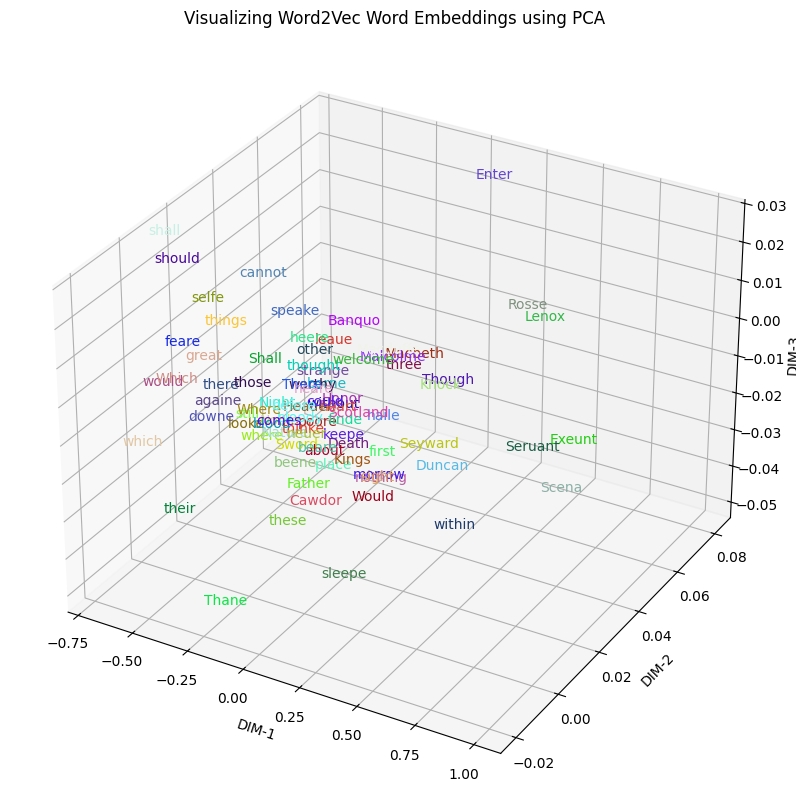

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words = list([e for e in model.wv.index_to_key if len(e) > 4])  # plot words longer than 4
# print("words:", words)

random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])
# print("words3d:", words3d)

def plotWords3D(vecs, words, title):
    """
    Parameters
    ----------
    vecs : numpy-array
        Transformed 3D array either by PCA or other techniques
    words: a list of word
        the word list to be mapped
    title: str
        The title of plot
    """
    ax = plt.figure(figsize=(14, 10)).add_subplot(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(
            vec[0],
            vec[1],
            vec[2],
            w,
            color=np.random.rand(
                3,
            ),
        )
    ax.set_xlim(min(vecs[:, 0]), max(vecs[:, 0]))
    ax.set_ylim(min(vecs[:, 1]), max(vecs[:, 1]))
    ax.set_zlim(min(vecs[:, 2]), max(vecs[:, 2]))
    ax.set_xlabel("DIM-1")
    ax.set_ylabel("DIM-2")
    ax.set_zlabel("DIM-3")
    plt.title(title)
    plt.show()


plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [17]:
# !pip install fasttext

In [18]:
# Parameters min_n and max_n take control the lengths of character ngrams.
# If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.

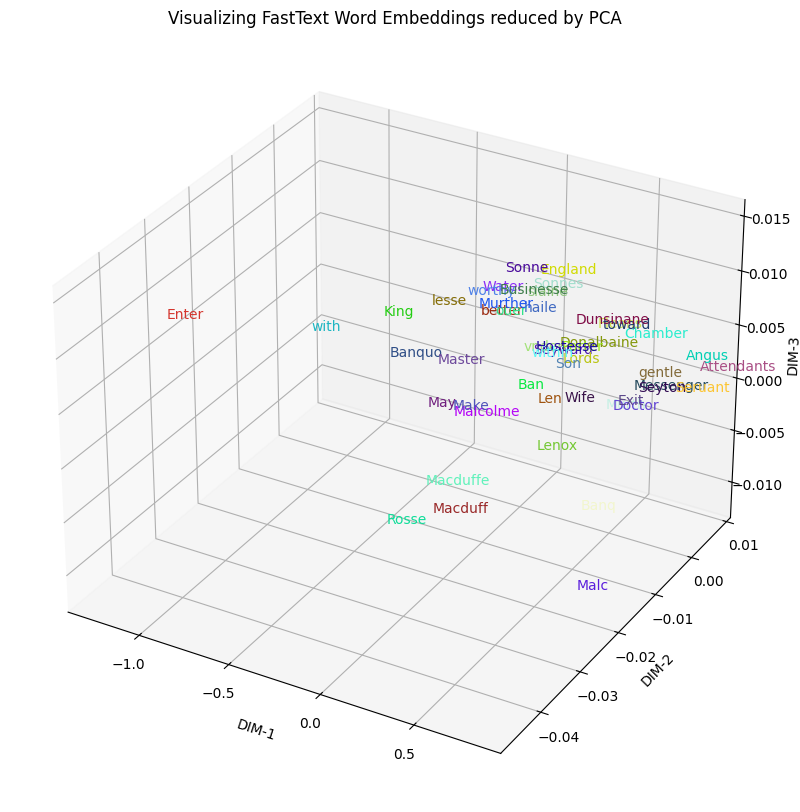

In [19]:
from gensim.models import FastText

# help(FastText)
model = FastText(
    sentences=macbeth,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=10,
    word_ngrams=1,
)
# min_n: min length of char ngrams (Default 3)
# max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words = [w[0] for w in model.wv.similar_by_word("Macbeth", 50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [20]:
## Glove

In [21]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
model = api.load(
    "glove-twitter-25"
)  # download the model and return as object ready for use

In [24]:
!tree -a ~/gensim-data

/root/gensim-data
├── glove-twitter-25
│   ├── glove-twitter-25.gz
│   ├── __init__.py
│   └── __pycache__
│       └── __init__.cpython-311.pyc
└── information.json

2 directories, 4 files


In [25]:
model.most_similar("java")

[('drupal', 0.8857485055923462),
 ('linux', 0.8667981028556824),
 ('electronic', 0.8582332134246826),
 ('adobe', 0.8580152988433838),
 ('developer', 0.8561978936195374),
 ('server', 0.8490769267082214),
 ('javascript', 0.8466134667396545),
 ('osx', 0.8394510746002197),
 ('enterprise', 0.8377523422241211),
 ('software', 0.8366124629974365)]

# LSTM Training

In [26]:
import numpy as np
import tensorflow as tf

In [27]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
!unzip SST-2.zip

--2025-02-25 05:22:15--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.128, 18.164.78.121, 18.164.78.72, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  --.-KB/s    in 0.1s    

2025-02-25 05:22:16 (47.7 MB/s) - ‘SST-2.zip’ saved [7439277/7439277]

Archive:  SST-2.zip
   creating: SST-2/
  inflating: SST-2/dev.tsv           
   creating: SST-2/original/
  inflating: SST-2/original/README.txt  
  inflating: SST-2/original/SOStr.txt  
  inflating: SST-2/original/STree.txt  
  inflating: SST-2/original/datasetSentences.txt  
  inflating: SST-2/original/datasetSplit.txt  
  inflating: SST-2/original/dictionary.txt  
  inflating: SST-2/original/original_rt_snippets.txt  
  inflating: SST-2/original/se

In [28]:
!tree -a ./SST-2

./SST-2
├── dev.tsv
├── original
│   ├── datasetSentences.txt
│   ├── datasetSplit.txt
│   ├── dictionary.txt
│   ├── original_rt_snippets.txt
│   ├── README.txt
│   ├── sentiment_labels.txt
│   ├── SOStr.txt
│   └── STree.txt
├── test.tsv
└── train.tsv

1 directory, 11 files


In [29]:
import pandas as pd

df = pd.read_csv("SST-2/train.tsv", sep="\t")
sentences = df.sentence
labels = df.label

In [30]:
df.head(3)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1


In [31]:
max_sen_len = max([len(s.split()) for s in sentences])
words = ["PAD"] + list(set([w for s in sentences for w in s.split()]))
word2idx = {w: i for i, w in enumerate(words)}
max_words = max(word2idx.values()) + 1
idx2word = {i: w for i, w in enumerate(words)}
# preparing training set
train = [list(map(lambda x: word2idx[x], s.split())) for s in sentences]

In [32]:
len(train), len(labels)

(67349, 67349)

In [33]:
sum(labels), len(labels), sum(labels) / len(labels)

(37569, 67349, 0.5578256544269403)

In [34]:
from keras import preprocessing

train_pad = preprocessing.sequence.pad_sequences(train, maxlen=max_sen_len)
print("train shape:", train_pad.shape)

train shape: (67349, 52)


In [35]:
print(train_pad)

[[    0     0     0 ...  8004  7228  9043]
 [    0     0     0 ...  5001 10882 14816]
 [    0     0     0 ...  5930  1510  9098]
 ...
 [    0     0     0 ... 12508  5339 14204]
 [    0     0     0 ...   992 12871  5224]
 [    0     0     0 ...  8004 13769  3455]]


In [38]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
# history = model.fit(train_pad, labels, epochs=15, batch_size=16, validation_split=0.2)
history = model.fit(train_pad, labels, epochs=1, batch_size=16, validation_split=0.2)

3368/3368 ━━━━━━━━━━━━━━━━━━━━ 99s 28ms/step - acc: 0.7088 - loss: 0.5390 - val_acc: 0.8581 - val_loss: 0.3342


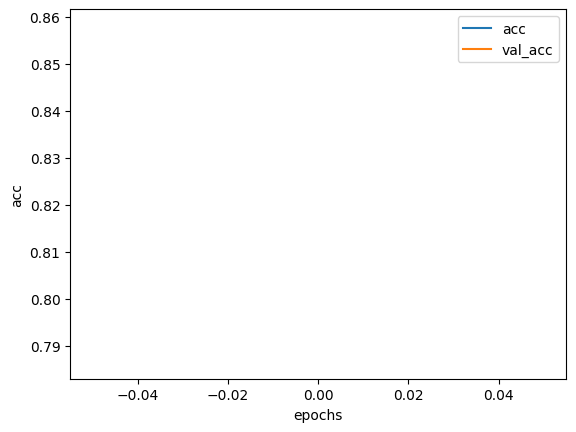

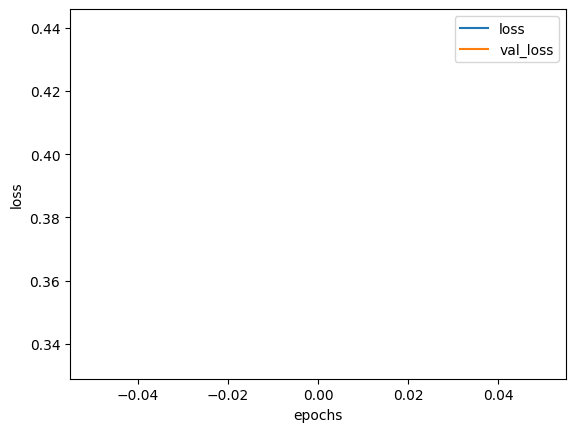

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()


plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [41]:
from keras import layers

model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
model.add(layers.Conv1D(32, 8, activation="relu"))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(32, 3, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", metrics=["acc"])
# history = model.fit(train_pad, labels, epochs=15, batch_size=32, validation_split=0.2)
history = model.fit(train_pad, labels, epochs=1, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1684/1684 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - acc: 0.6467 - loss: 0.6055 - val_acc: 0.8216 - val_loss: 0.3860


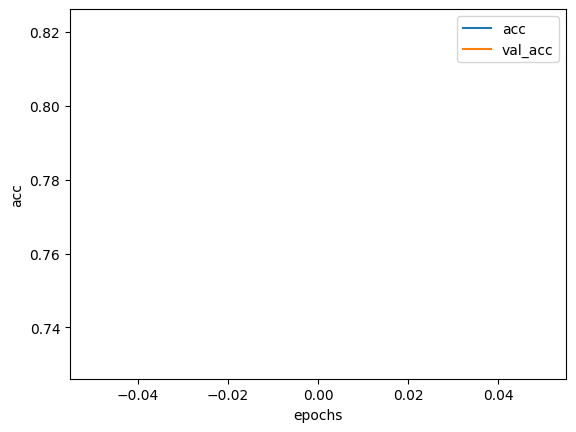

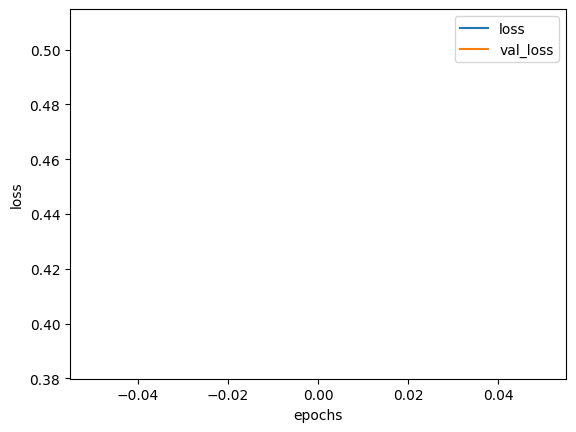

In [42]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")